In [51]:
import pandas as pd
import glob
import re
import emoji
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [52]:

# read all files starting with "./results", reading them in a dataframe

df = pd.DataFrame()
for file in glob.glob("./results*.json"):
    df = pd.concat([df, pd.read_json(file)])

In [53]:
df.count()

caption    14929
user       14929
views      14929
dtype: int64

In [54]:
# remove duplicates by caption
df = df.drop_duplicates(subset='caption')

# remove rows with no caption
df = df[df.caption.notnull()]

df.count()

caption    14079
user       14079
views      14079
dtype: int64

In [55]:
df.head()

,caption,user,views
0,#ad ⚠️😳⚠️#sonobisquedollwakoiwosuru #ezioh ...,5yu_6,8.6M
1,#ad Spring nails using @beetlesgelpolishoffic...,jesslizs,5.3M
2,#ad,idkclairek,3M
3,#ad my new heyup boxe projector is everything...,caitlinnlam,2.9M
4,Air up is never gonna let you down😎🔥 @airup ...,qucee,636.8K


In [56]:
df.views = df.views.apply(lambda x: float(x[:-1]) * (10**6) if x[-1] == 'M' else float(x[:-1]) * (10**3))
df.head()

,caption,user,views
0,#ad ⚠️😳⚠️#sonobisquedollwakoiwosuru #ezioh ...,5yu_6,8600000.0
1,#ad Spring nails using @beetlesgelpolishoffic...,jesslizs,5300000.0
2,#ad,idkclairek,3000000.0
3,#ad my new heyup boxe projector is everything...,caitlinnlam,2900000.0
4,Air up is never gonna let you down😎🔥 @airup ...,qucee,636800.0


In [57]:
# extract hashtags out of caption
df['hashtags'] = df.caption.apply(lambda x: re.findall(r'#\w+', x))

# extract mentions out of caption
df['mentions'] = df.caption.apply(lambda x: re.findall(r'@\w+', x))

# extract emojis out of caption
def extract_emojis(s):
  return list(c for c in s if c in emoji.UNICODE_EMOJI['en'])
df['emojis'] = df.caption.apply(lambda x: extract_emojis(x))

# extract links out of caption
df['links'] = df.caption.apply(lambda x: re.findall(r'http\S+', x))

In [58]:
# determine if the post is labelled as advertisement or sponsored
df['is_ad'] = df.caption.apply(lambda x: 'advertisement' in x.lower() or 'sponsored' in x.lower() or '#ad' in x.lower())

df.head()

,caption,user,views,hashtags,mentions,emojis,links,is_ad
0,#ad ⚠️😳⚠️#sonobisquedollwakoiwosuru #ezioh ...,5yu_6,8600000.0,"[#ad, #sonobisquedollwakoiwosuru, #ezioh, #myd...",[],"[⚠, 😳, ⚠]",[],True
1,#ad Spring nails using @beetlesgelpolishoffic...,jesslizs,5300000.0,"[#ad, #springnails, #diynails, #amazonnailfind...",[@beetlesgelpolishofficial],"[💙, 💅]",[],True
2,#ad,idkclairek,3000000.0,[#ad],[],[],[],True
3,#ad my new heyup boxe projector is everything...,caitlinnlam,2900000.0,"[#ad, #projector, #ghibli]",[],"[🌱, ☁]",[],True
4,Air up is never gonna let you down😎🔥 @airup ...,qucee,636800.0,[#ad],"[@airup, @Apson]","[😎, 🔥]",[],True


In [59]:
df.count()

caption     14079
user        14079
views       14079
hashtags    14079
mentions    14079
emojis      14079
links       14079
is_ad       14079
dtype: int64

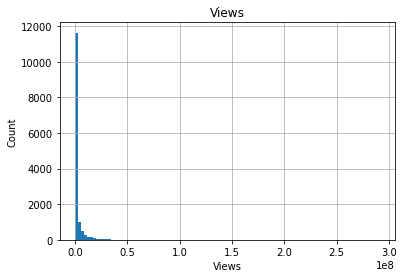

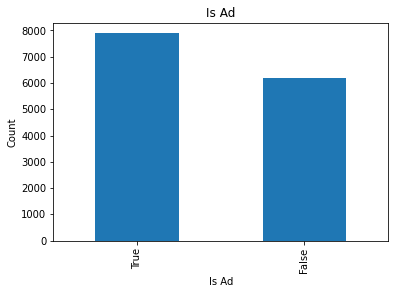

Views mean: 2653582.804176433
Views median: 408000.0
Views max: 290800000.0
Views min: 3000.0
Views std: 9245787.746387193
Views skew: 13.099556179753664
Views kurtosis: 277.31731247643216
Is Ad mean: 0.5601250088784715
Is Ad median: 1.0
Is Ad max: True
Is Ad min: False
Is Ad std: 0.49638944864575263
Is Ad skew: -0.24228376065138588
Is Ad kurtosis: -1.9415744109172266
Correlation between views and is_ad: -0.10783958012610344


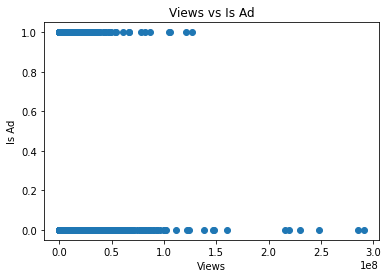

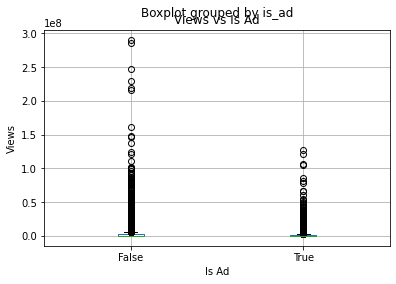

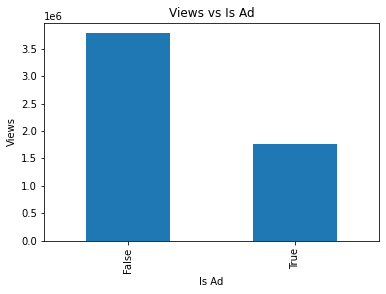

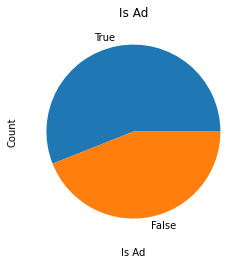

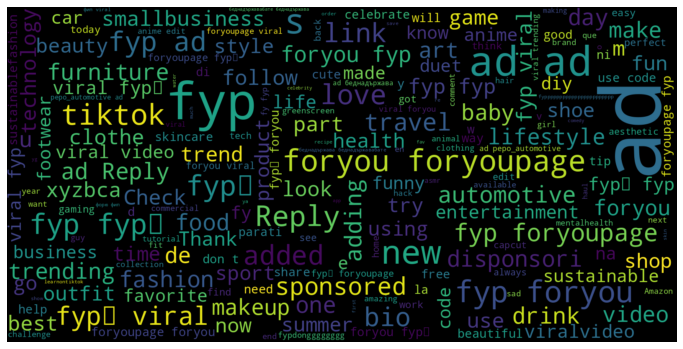

In [60]:
# show relevant histograms
df.views.hist(bins=100)
plt.title('Views')
plt.ylabel('Count')
plt.xlabel('Views')
plt.show()

df.is_ad.value_counts().plot(kind='bar')
plt.title('Is Ad')
plt.ylabel('Count')
plt.xlabel('Is Ad')
plt.show()

# show relevant statistics
print('Views mean:', df.views.mean())
print('Views median:', df.views.median())
print('Views max:', df.views.max())
print('Views min:', df.views.min())
print('Views std:', df.views.std())
print('Views skew:', df.views.skew())
print('Views kurtosis:', df.views.kurtosis())
print('Is Ad mean:', df.is_ad.mean())
print('Is Ad median:', df.is_ad.median())
print('Is Ad max:', df.is_ad.max())
print('Is Ad min:', df.is_ad.min())
print('Is Ad std:', df.is_ad.std())
print('Is Ad skew:', df.is_ad.skew())
print('Is Ad kurtosis:', df.is_ad.kurtosis())

# show relevant correlations
print('Correlation between views and is_ad:', df.views.corr(df.is_ad))

# show relevant scatter plots
plt.scatter(df.views, df.is_ad)
plt.title('Views vs Is Ad')
plt.ylabel('Is Ad')
plt.xlabel('Views')
plt.show()

# show relevant box plots
df.boxplot(column='views', by='is_ad')
plt.title('Views vs Is Ad')
plt.ylabel('Views')
plt.xlabel('Is Ad')
plt.show()

# show relevant bar plots
df.groupby('is_ad').views.mean().plot(kind='bar')
plt.title('Views vs Is Ad')
plt.ylabel('Views')
plt.xlabel('Is Ad')
plt.show()

# show relevant word clouds
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(' '.join(df.caption))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# show relevant word clouds
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(' '.join(df.user))
